In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1**

загрузка и проверка набора данных

In [ ]:
df = pd.read_csv("Набор данных.csv", sep=';')
df

,Id,Площадь земельного участка,Район расположения,Общая оценка отделки дома,Тип крыши,Площадь 1-го этажа,Площадь 2-го этажа,Количество каминов,Площадь гаража,Цена
0,4,9550,Crawfor,7,Gable,961,756.0,1,642,140000
1,6,14115,Mitchel,5,Gable,796,566.0,0,480,143000
2,9,6120,OldTown,7,Gable,1022,752.0,2,468,129900
3,10,7420,BrkSide,5,Gable,1077,0.0,2,205,118000
4,11,11200,Sawyer,5,Hip,1040,0.0,0,384,129500
...,...,...,...,...,...,...,...,...,...,...
895,1453,3675,Edwards,5,Gable,1072,0.0,0,525,145000
896,1454,17217,Mitchel,5,Gable,1140,0.0,0,0,84500
897,1456,7917,Gilbert,6,Gable,953,694.0,1,460,175000
898,1459,9717,NAmes,5,Hip,1078,0.0,0,240,142125


определение общего объема

In [ ]:
print(f"колв-во объектов: {df.shape[0]}, кол-во колонок {df.shape[1]}")

колв-во объектов: 900, кол-во колонок 10


пропущенные значения и типы данных

In [ ]:
df.isna().sum()

Id                             0
Площадь земельного участка     0
Район расположения             0
Общая оценка отделки дома      0
Тип крыши                     22
Площадь 1-го этажа             0
Площадь 2-го этажа            16
Количество каминов             0
Площадь гаража                 0
Цена                           0
dtype: int64

Пропуски встречаются в:
- Тип крыши (22 пропуска, 2.5% от выборки)
- Площадь втрого этажа (16 пропусков, 1.7% от выборки)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          900 non-null    int64  
 1   Площадь земельного участка  900 non-null    int64  
 2   Район расположения          900 non-null    object 
 3   Общая оценка отделки дома   900 non-null    int64  
 4   Тип крыши                   878 non-null    object 
 5   Площадь 1-го этажа          900 non-null    int64  
 6   Площадь 2-го этажа          884 non-null    float64
 7   Количество каминов          900 non-null    int64  
 8   Площадь гаража              900 non-null    int64  
 9   Цена                        900 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 70.4+ KB


Тип крыши, Район расположения - строковые столбцы.

Все остальные столбцы - колличественные

**Вывод:**
Так, логика в выборе типов данных имеется.
За исключением пропусков, нам предоставлен корректный набор данных.

**Задание 2**

выводим описательные статистики, визуализируем распределения. Определяем новый df_num, содержащий лишь количественные признаки (Уберем из рассмотрения Id, т.к. он бесполезен с точки зрения анализа)

In [ ]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.drop('Id', axis=1, inplace=True)
df.describe()

,Id,Площадь земельного участка,Общая оценка отделки дома,Площадь 1-го этажа,Площадь 2-го этажа,Количество каминов,Площадь гаража,Цена
count,900.000000,900.000000,900.000000,900.000000,884.000000,900.000000,900.000000,900.000000
mean,738.798889,8832.823333,5.361111,1019.538889,248.298643,0.423333,385.617778,134335.215556
std,420.719698,4441.379369,1.000355,301.938107,336.531181,0.594478,187.713828,29243.849952
min,4.000000,1300.000000,1.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,380.750000,6957.750000,5.000000,826.500000,0.000000,0.000000,280.000000,116037.500000
50%,747.500000,8712.000000,5.000000,978.000000,0.000000,0.000000,400.000000,136700.000000
75%,1098.250000,10402.500000,6.000000,1163.250000,584.000000,1.000000,500.000000,156949.000000
max,1460.000000,63887.000000,10.000000,4692.000000,1230.000000,3.000000,1418.000000,180500.000000


In [ ]:
print("Коэф. Ассиметрии\n",df_num.skew())
print()
print("Коэф. Эксцесса\n",df_num.kurtosis())

Коэф. Ассиметрии
 Площадь земельного участка    4.304927
Общая оценка отделки дома    -0.089079
Площадь 1-го этажа            2.554248
Площадь 2-го этажа            0.818693
Количество каминов            1.110251
Площадь гаража                0.218131
Цена                         -0.543257
dtype: float64

Коэф. Эксцесса
 Площадь земельного участка    43.759382
Общая оценка отделки дома      1.263021
Площадь 1-го этажа            24.177641
Площадь 2-го этажа            -0.928455
Количество каминов             0.380688
Площадь гаража                 2.207941
Цена                           0.000641
dtype: float64


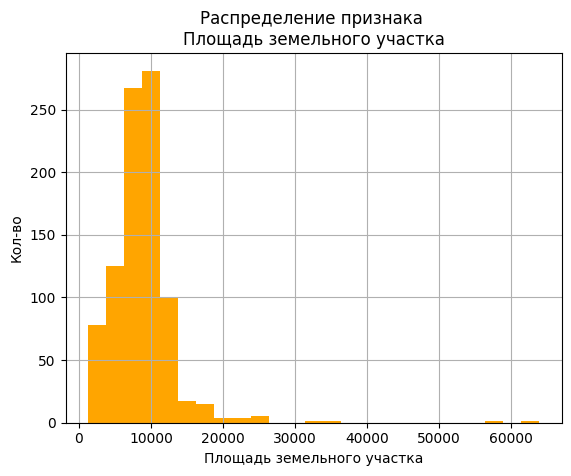

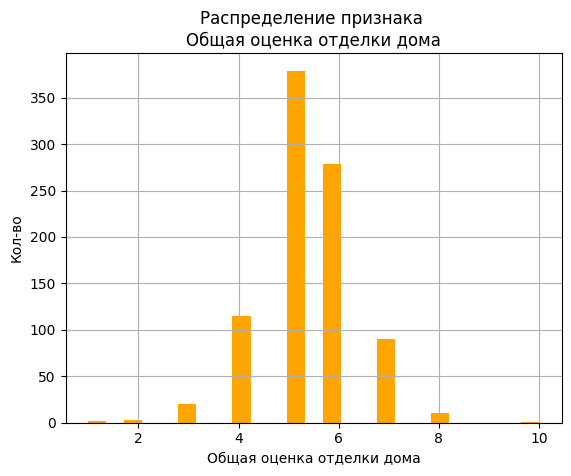

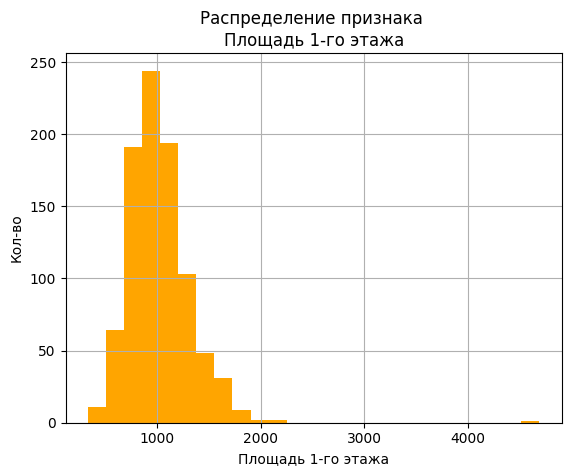

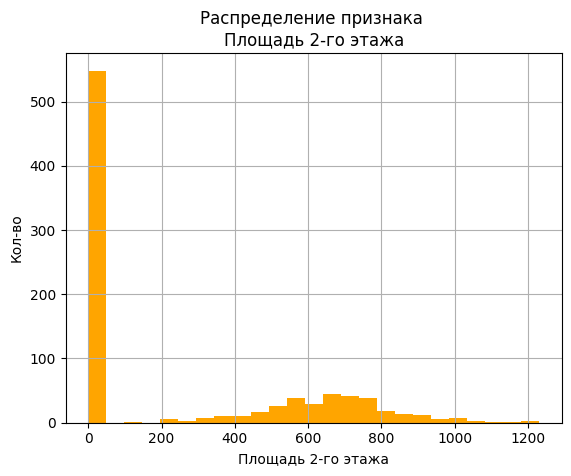

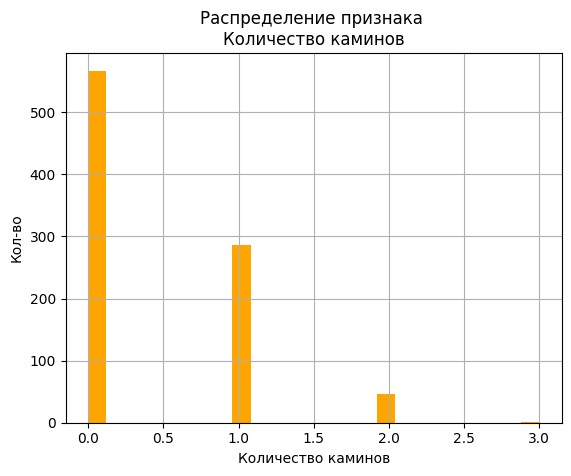

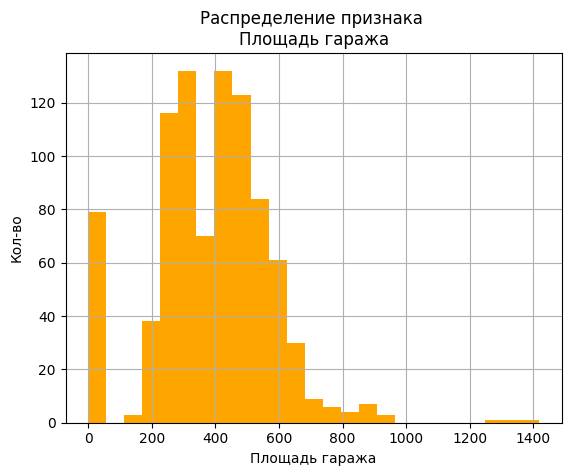

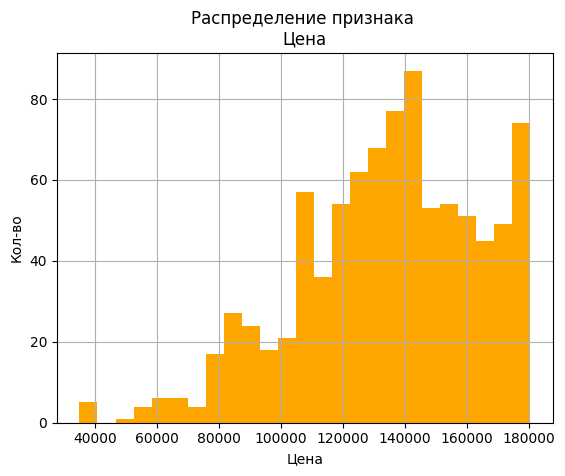

In [ ]:
for s in df_num:
  plt.hist(df_num[s], color = 'orange', bins=25)
  plt.ylabel('Кол-во')
  plt.xlabel(s)
  plt.title(f'Распределение признака \n{s}')
  plt.grid()
  plt.show()

Анализ:

Для дальнейшего анализа, выявим ассиметричность, выбросы и проанализируем группы

Итак, Площадь - распределена нормально. коэф. Эксцесса - большой, и отражает степень "заостренности". Коэф. Ассимметрии - говорит о смещении влево
- от 7.000 до 11.000 - наиболее распространённая группа
- от 14.000 до 25.000 - наименее распространённая группа (большие значения соотв. выбросам)
- до 7.000 - средне-распространённая группа.


Общая оценка отделки дома. Нормальное распределение.

- 5-6 баллов - наиболее часто встречающаяся оценка
- 4, 7 баллов - встречается реже
- 3, 8 баллов - самая малочисленная группа (по оценкам) (остальные значения в 1,2, 10 - соотв. выбросам)


Площадь 1-го этажа. Большой коэф. Эксцесса, заостренность, смещение влево. Распределение - нормальное
- от 800 до 900, от 1000 до 1100 - наиболее распространённая группа.
- от 400 до 800, от 1100 до 1200 - средняя по распространенности группа.
- до 400, от 1200 до 1900 - Самая нераспространенная группа.
- (все остальные значения соотв. выбросам)

Площадь 2-го этажа. Нормальное распределение
- 0 - наиболее распространённая группа (соответствует домам без второго этажа).
- от 450 до 800 - наиболее распространенная группа (среди тех, у которых есть второй этаж)
- от 200 до 400, от 800 до 1000 - Самая нераспространенная группа.
- (все остальные значения соотв. выбросам)


Кол-во каминов.
- 0 - наиболее распространённая группа(большее кол-во домов - без каминов).
- 1 - средняя по распространенности группа.
- 2 - Самая нераспространенная группа.

Площадь гаража. Нормальное распределение
- 0 - наиболее распространённая группа (соответствует домам без гаража).
- от 200 до 350, от 400 до 500 - наиболее распространенная группа (среди тех, у которых есть гараж)
- от 350 до 400, от 500 до 600 - Среднераспространенная группа.
- от 600 до 1000 - наименеераспространенная группа
- (все остальные значения соотв. выбросам)

Цена - распределена нормально.
- от 120.000 до 180.000 - наиболее распространённая группа
- от 75.000 до 12.000 - среднераспространенная группа
- от 35.000 до 75.000 - малочисленная группа.

**Вывод:**
В данных есть пропуски, имеются выбросы. Из-зна наличия выбросов, нам не подходит метод корреляции Пирсона. Будем использовать метод корреляции Спирмена.

**Задание 3**

Так, во всех парах, где есть столбцы с выбросами - будем использовать корреляцию Спирмена

Для начала, уберём из рассмотрения пропущенные значения

In [ ]:
df_num = df_num.dropna(subset=['Площадь 2-го этажа'])

In [ ]:
import scipy.stats as sts
for i in range(len(df_num.columns)):
  tmp1 = df_num.columns[i]
  for j in range(i+1, len(df_num.columns)):
    tmp2 = df_num.columns[j]
    spearman = sts.spearmanr(df_num[tmp1], df_num[tmp2])
    print(f"(Спирмен): {tmp1}/{tmp2}: \n", spearman[0], f"[Pvalue<0.05: {spearman[1]<0.05}]")



(Спирмен): Площадь земельного участка/Общая оценка отделки дома: 
 -0.04863396052188037 [Pvalue<0.05: False]
(Спирмен): Площадь земельного участка/Площадь 1-го этажа: 
 0.3945391507165136 [Pvalue<0.05: True]
(Спирмен): Площадь земельного участка/Площадь 2-го этажа: 
 -0.11160981588448717 [Pvalue<0.05: True]
(Спирмен): Площадь земельного участка/Количество каминов: 
 0.17604886394609542 [Pvalue<0.05: True]
(Спирмен): Площадь земельного участка/Площадь гаража: 
 0.2170141275762387 [Pvalue<0.05: True]
(Спирмен): Площадь земельного участка/Цена: 
 0.2666867171068038 [Pvalue<0.05: True]
(Спирмен): Общая оценка отделки дома/Площадь 1-го этажа: 
 0.050902160594313885 [Pvalue<0.05: False]
(Спирмен): Общая оценка отделки дома/Площадь 2-го этажа: 
 0.2955706861845685 [Pvalue<0.05: True]
(Спирмен): Общая оценка отделки дома/Количество каминов: 
 0.29889946995582706 [Pvalue<0.05: True]
(Спирмен): Общая оценка отделки дома/Площадь гаража: 
 0.2100081414499543 [Pvalue<0.05: True]
(Спирмен): Общая оц

Выделим 4 основных корреляции:
- Общая оценка отделки дома/цена (0.57) - наиболее сильная корреляционная зависимость. Так, можно сказать, что при высокой цене - в большинстве сулчаев будет хорошая отделка
- Площадь гаража/цена (0.42). Так, площадь гаража зависит от цены. Их зависимость - средняя
- Кол-во камнов/цена (0.39). Так, Кол-во камнов зависит от цены. Их зависимость - средняя
- Площадь земельного участка/Площадь 1-го этажа (0.39). Так, чем больше площадь учатска - тем больше и первый этаж. Зависимость - средняя

**Вывод:** Основнные выделенные зависимости - говорят о том, какие признаки в первую очередь влияют на цену. Последняя из приведенных зависимостей - говорит о наличии связи между площадью первого этажа и площадью территории.

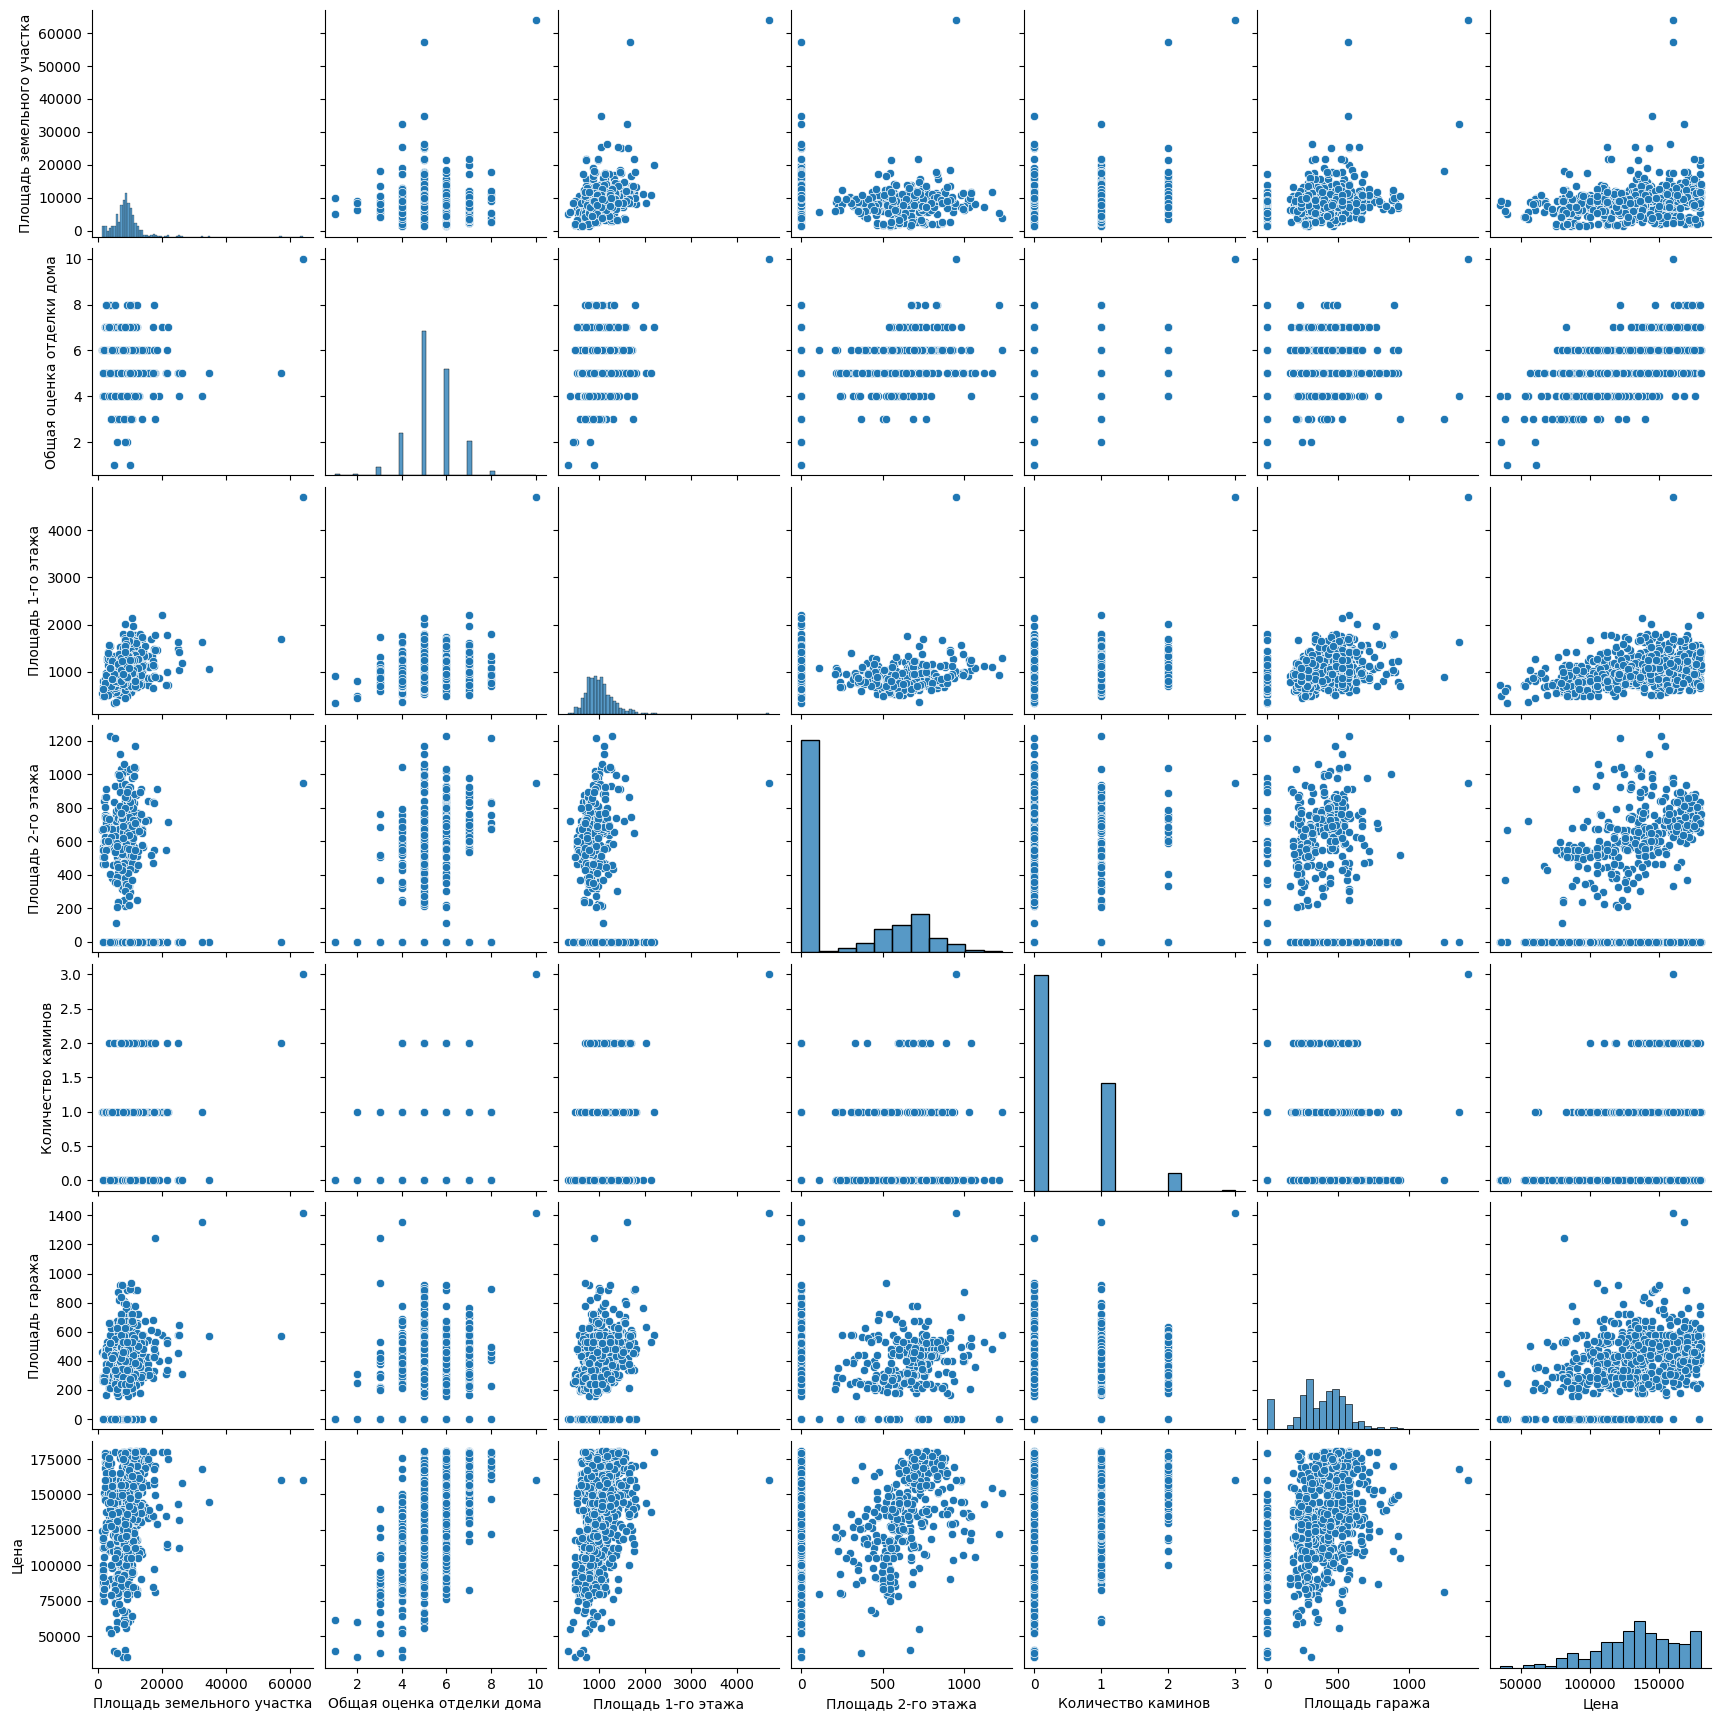

In [ ]:
sns.pairplot(df_num, kind="scatter")
plt.show()

приведённые зависимости видны и на графиках. Встречаются и смежные зависимости


**Вывод:** В целом, данные сходятся

**Задание 4**

выведем все категориальные признаки в отдельный датасет

In [ ]:
df_cat = df.select_dtypes(include=['object'])

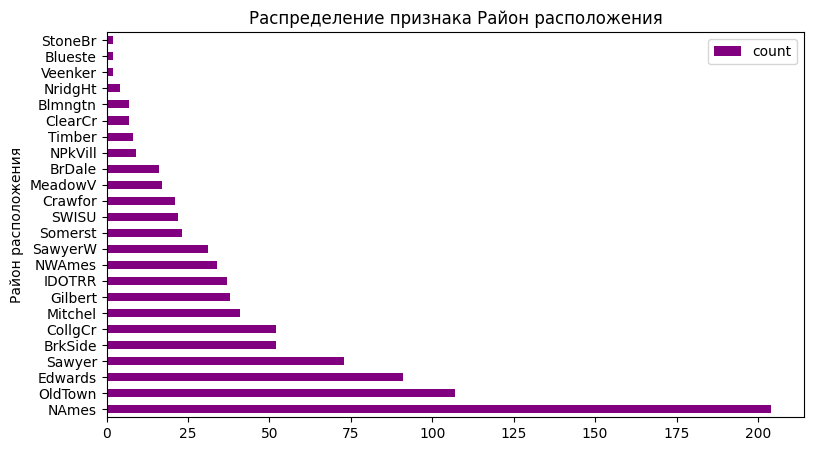

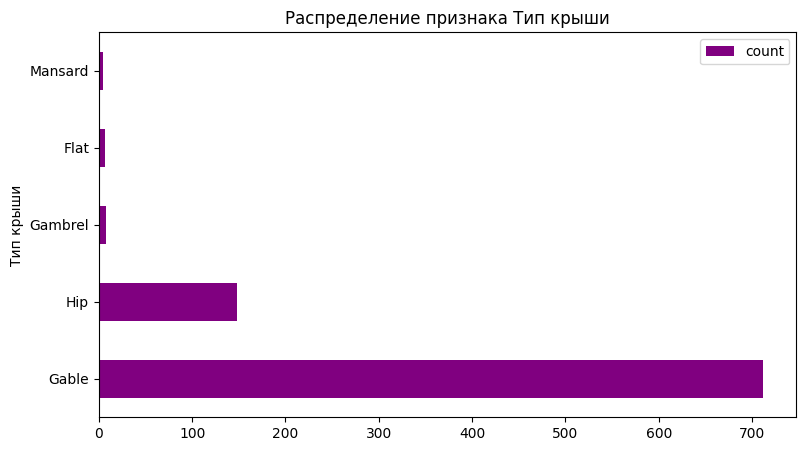

In [ ]:
for col in df_cat:
    plt.figure(figsize=(9, 5))
    df_cat[col].value_counts().plot(kind='barh', color='purple')
    plt.title(f"Распределение признака {col}")
    plt.legend()
    plt.show()

Как мы видим,
- NAmes - самый распространённый район проживания
- Blueste, Veenker, StoneBr - самые редки районы проживания

Тип крыши:
- Gаble - самый распространенный
- Hip - менее распространенный
- Gambrel, Flat, Mansard - самый редкие типы крыш.

In [ ]:
print("Входные признаки между собой\n")
for i in df_cat:
  for j in df_cat:
        if i != j:
            print(f"\nТаблица сопряженности для '{i}' и '{j}':")
            print(pd.crosstab(df_cat[i], df_cat[j], margins=True))
print("=======================================================================================")

Входные признаки между собой


Таблица сопряженности для 'Район расположения' и 'Тип крыши':
Тип крыши           Flat  Gable  Gambrel  Hip  Mansard  All
Район расположения                                         
Blmngtn                0      4        0    3        0    7
Blueste                0      2        0    0        0    2
BrDale                 0     16        0    0        0   16
BrkSide                0     48        1    2        0   51
ClearCr                2      4        0    1        0    7
CollgCr                0     45        0    5        0   50
Crawfor                0     19        0    2        0   21
Edwards                2     65        2   18        0   87
Gilbert                0     35        0    3        0   38
IDOTRR                 0     31        1    5        0   37
MeadowV                0     17        0    0        0   17
Mitchel                0     34        0    6        1   41
NAmes                  2    143        1   55        0  201
NPkVill

**Вывод:** Как мы видим, большинство элементов <5. Из этого следует, что применять критерий "хи-квадрат" - нельзя. Вариант "объединения" строк/столбцов также бесполезен, т.к. все равно останутся нули, и их кол-во будет превышать норму. Если же объединить данные так, чтобы нулей, и чисел <5 не было, то такая таблица окажется непригодной для интерпретации, т.к. фактиечки будет означать: "Кол-во любых крыш в этих n группах районов"

**Задание 5**

In [ ]:
print("Процентное соотношение пропусков в признаке 'Вес (карат)':",
      f"{(df['Тип крыши'].isna().sum() / len(df)) * 100:.3f}%")
print("Процентное соотношение пропусков в признаке 'Цвет':",
      f"{(df['Площадь 2-го этажа'].isna().sum() / len(df)) * 100:.3f}%")

Процентное соотношение пропусков в признаке 'Вес (карат)': 2.444%
Процентное соотношение пропусков в признаке 'Цвет': 1.778%


Пропуски встречаются в:
- Тип крыши (22 пропуска, 2.4% от выборки)
- Площадь втрого этажа (16 пропусков, 1.8% от выборки)

В обоих случаях, пропуск составляет <5% от выборки. Значит, записи с пропусками можно удалить.

Но есть и другой путь:
- Тип крыши - можно заполнить пропуски наиболее часто встречающимся значением
- Площадь второго этажа - можно заполнить пропуски медианой

Заполним Тип крыши и Площадь 2-го эатажа именно такими способами

Проверим, связаны ли пропуски

In [ ]:
cnt = df[(df['Тип крыши'].isnull())&(df['Площадь 2-го этажа'].isnull())].shape[0]
print('Число совместного появления пропусков в обоих столбцах:', cnt)

count1 = df[(df['Тип крыши'].isnull())&(df['Площадь 2-го этажа'].notnull())].shape[0]
print(f'Число появления пропусков только в столбце Площадь 2-го этажа:', count1)

count2 = df[(df['Тип крыши'].notnull())&(df['Площадь 2-го этажа'].isnull())].shape[0]
print(f'Число появления пропусков только в столбце Площадь 2-го этажа:', count2)

Число совместного появления пропусков в обоих столбцах: 0
Число появления пропусков только в столбце Площадь 2-го этажа: 22
Число появления пропусков только в столбце Площадь 2-го этажа: 16


Нет, они происходят в разных записях

выведем эти пропуски:


In [92]:
df[df['Тип крыши'].isna()==True]

,Id,Площадь земельного участка,Район расположения,Общая оценка отделки дома,Тип крыши,Площадь 1-го этажа,Площадь 2-го этажа,Количество каминов,Площадь гаража,Цена
10,19,13695,SawyerW,5,NaN,1114,0.0,0,576,159000
21,37,10859,CollgCr,5,NaN,1097,0.0,0,672,145000
50,79,10778,Sawyer,4,NaN,1768,0.0,0,0,136500
72,111,9525,Edwards,6,NaN,1216,639.0,0,325,136900
76,118,8536,Edwards,5,NaN,1125,0.0,0,430,155000
109,178,13650,Sawyer,5,NaN,1252,668.0,1,451,172500
123,203,7000,OldTown,6,NaN,865,445.0,0,398,112000
151,249,11317,CollgCr,7,NaN,840,828.0,0,500,180000
165,274,9600,NAmes,6,NaN,1632,0.0,1,338,139000
186,312,8000,NAmes,6,NaN,972,0.0,1,240,132000


In [94]:
df['Тип крыши'].fillna(df['Тип крыши'].mode()[0], inplace = True)

In [95]:
df['Площадь 2-го этажа'].fillna(df['Площадь 2-го этажа'].mean(), inplace = True)

In [96]:
df.isna().sum()

Id                            0
Площадь земельного участка    0
Район расположения            0
Общая оценка отделки дома     0
Тип крыши                     0
Площадь 1-го этажа            0
Площадь 2-го этажа            0
Количество каминов            0
Площадь гаража                0
Цена                          0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          900 non-null    int64  
 1   Площадь земельного участка  900 non-null    int64  
 2   Район расположения          900 non-null    object 
 3   Общая оценка отделки дома   900 non-null    int64  
 4   Тип крыши                   900 non-null    object 
 5   Площадь 1-го этажа          900 non-null    int64  
 6   Площадь 2-го этажа          900 non-null    float64
 7   Количество каминов          900 non-null    int64  
 8   Площадь гаража              900 non-null    int64  
 9   Цена                        900 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 70.4+ KB


Как мы видим, всё прошло успешно!

**Задание 6**

In [98]:
from sklearn.model_selection import train_test_split

X = df.drop(['Цена'],axis=1)
y = df['Цена']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size = 0.1)

In [100]:
df.describe()

,Id,Площадь земельного участка,Общая оценка отделки дома,Площадь 1-го этажа,Площадь 2-го этажа,Количество каминов,Площадь гаража,Цена
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,738.798889,8832.823333,5.361111,1019.538889,248.298643,0.423333,385.617778,134335.215556
std,420.719698,4441.379369,1.000355,301.938107,333.523021,0.594478,187.713828,29243.849952
min,4.000000,1300.000000,1.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,380.750000,6957.750000,5.000000,826.500000,0.000000,0.000000,280.000000,116037.500000
50%,747.500000,8712.000000,5.000000,978.000000,0.000000,0.000000,400.000000,136700.000000
75%,1098.250000,10402.500000,6.000000,1163.250000,577.000000,1.000000,500.000000,156949.000000
max,1460.000000,63887.000000,10.000000,4692.000000,1230.000000,3.000000,1418.000000,180500.000000


Так как нам нужно отмасштабировать коллиечственные данные, и каждая из колонок существенно олтичается друг от друга, то можно применить StandardScaler

Обратим внимание, что наши категориальные признаки - номинальные. Единственным подходящим способом кодирования является *Бинарное кодирование*. Однако, у нас может появиться новое значение признака (которого небыло до этого в обучающей выборке)

In [118]:
from sklearn.preprocessing import Binarizer

df_cats = df.select_dtypes(include=['object']).columns.tolist()
_bin = Binarizer()

X_train[df_cats] = _bin.fit_transform(X_train[df_cats])
X_test[df_cats] = _bin.transform(X_test[df_cats])

ValueError: could not convert string to float: 'NAmes'

In [115]:
from sklearn.preprocessing import StandardScaler

df_nums = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

X_train[df_nums] = scaler.fit_transform(X_train[df_nums])
X_test[df_nums] = scaler.transform(X_test[df_nums])

**Задание 7**